In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df=pd.read_excel(r"C:\Users\VATSAL PARIKH\Downloads\Bengaluru_House_Data.xlsx")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,2025-12-19 00:00:00,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
print("\nMissing values in each coloumn: ")
print(df.isnull().sum())


Missing values in each coloumn: 
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [6]:
columns_to_drop = ['area_type','society' ,'balcony' , 'availability']
df.drop(columns=[col for col in columns_to_drop if col in df.columns],inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
df['BHK']=df['size'].str.extract(r'(\d+)').astype(float)

In [9]:
df.drop(columns=['size'],inplace=True)

In [10]:
def convert_sqft(sqft):
    try:
        if '-' in sqft:
            sqft_values=sqft.split('-')
            return (float(sqft_values[0])+float(sqft_values[1]))/2
        return float(sqft)
    except:
        return np.nan

In [11]:
df['total_sqft']=df['total_sqft'].apply(convert_sqft)

In [12]:
df.dropna(inplace=True)

In [13]:
df['price_per_sqft']=df['price']*100000 / df['total_sqft']

In [14]:
df=pd.get_dummies(df,columns=['location'], drop_first=True)

In [15]:
X= df.drop(columns=['price'])
y=df['price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred) 


In [20]:
print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



Model Performance:
Mean Absolute Error (MAE): 10.97
Mean Squared Error (MSE): 241.53
Root Mean Squared Error (RMSE): 15.54
R² Score: 0.93


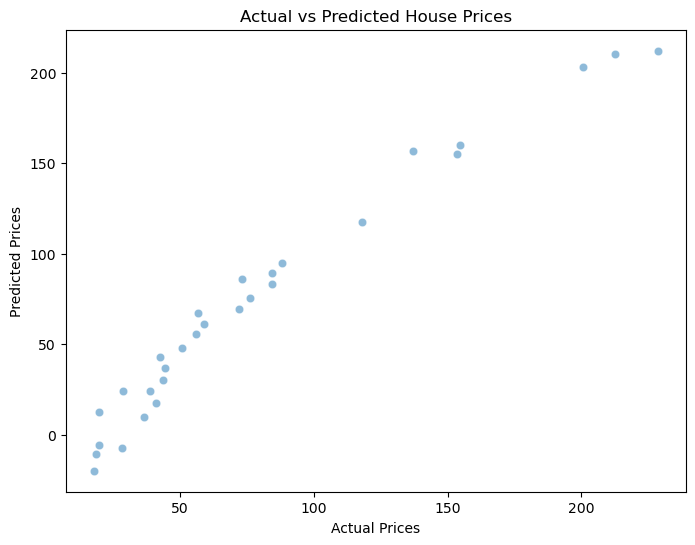

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()